### **Resturant Rating Prediction Case Study**

**Scenario:**
- Zomato, the online food app has several resturant with them and they want to predict how good or bad a resturant will turn out in the future. So they can take furthur action using that data.
- Data shared has **9551** resturants all over the world which are present in the Zomato App. It contains the details about the restaurants and what rating it achieved finally.

**Objective:** Creating a ML model to predict the Rating of resturant based on its characterstics, using supervised ML regression problem.

## Flow of case study:

The flow of the case study is as below:

- Reading the data in python
- Defining the problem statement
- Identifying the Target variable
- Looking at the distribution of Target variable
- Basic Data exploration
- Feature Engineering
- Rejecting useless columns
- Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
- Feature Selection based on data distribution
- Outlier treatment
- Missing Values treatment
- Visual correlation analysis
- Statistical correlation analysis (Feature Selection)
- Converting data to numeric for ML
- Sampling and K-fold cross validation
- Trying multiple Regression algorithms
- Selecting the best Model
- Deploying the best model in production

In [11]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [12]:
!pip install chardet


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
# import chardet

# with open('../Datasets/ZomatoData.csv', 'rb') as f:
#     result = chardet.detect(f.read(100000))
#     print(result)

# # Use the detected encoding
# ZomatoData = pd.read_csv('../Datasets/ZomatoData.csv', encoding=result['encoding'])

# ZomatoData.head()

In [14]:
ZomatoData=pd.read_csv('../Datasets/ZomatoData.csv', encoding='ISO-8859-1')
ZomatoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [15]:
# Printing data before deleting duplicates
print('Shape before deleting duplicates values:', ZomatoData.shape)

# Removing duplicate data if any
ZomatoData=ZomatoData.drop_duplicates()
print('Shape after deleting duplicates values:', ZomatoData.shape)

# Printing data
ZomatoData.head()

Shape before deleting duplicates values: (9551, 19)
Shape after deleting duplicates values: (9551, 19)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


In [16]:
ZomatoData.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range', 'Votes',
       'Average Cost for two', 'Rating'],
      dtype='object')

### **Defining the problem statement**

**Create a Predictive model which can predict the future Rating of a restaurant**


- **Target Variable:** Rating
- **Predictors:** location, menu, cost etc.

In [17]:
min_value = ZomatoData['Rating'].min()
max_value = ZomatoData['Rating'].max()
range_value = max_value - min_value

print(f"Minimum Rating: {min_value}")
print(f"Maximum Rating: {max_value}")
print(f"Range of Rating: {range_value}")

Minimum Rating: 1.0
Maximum Rating: 4.9
Range of Rating: 3.9000000000000004


### **Determining the type of Machine Learning**

- As the target variable is Continuous, we need to create a **Supervised ML Regression Model**

### **Looking at the distribution of Target variable**

- If the variable's distribution is too skewed then the predictive modeling will not be possible.
- Bell curve is desirable but slightly skew or negative skew is also fine
- While performing Regression, histogram should look like a bell curve or slightly skewed version of it.

<Axes: >

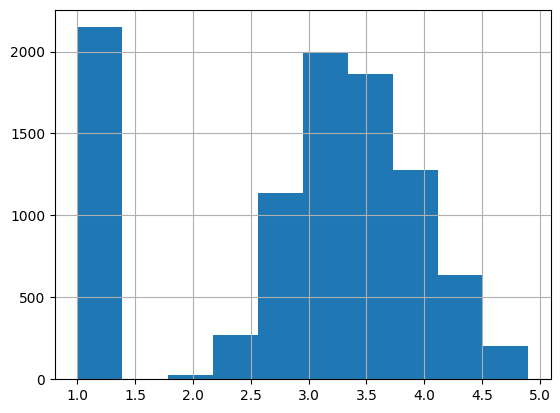

In [18]:
%matplotlib inline
# Creating bar char as the Target Variable is Continuous
ZomatoData['Rating'].hist()

The data distribution of the target variable is satisfactory to proceed further, there are sufficient number of rows for each type of values to learn from.

### **Basic Data Exploration**

Gauging the overall data, volume of data, the type of columns present in the data.

- Initial assessment of the data should be done to identify which columns are Qualitative, Categorical and Quantitative.

- This step helps to reject columns that may affect the target variables and if not then keep them for further analysis.

- Commands useful for basic data exploration:
    - **head()**: Helps to checkout first few rows (5 by default) of the data 
    - **info()**: Provides summarized information of the data
    - **describe()**: Provides descriptive statistical details of the data
    - **nunique()**: Helps to identify if a column is categorical or continuous

In [19]:
ZomatoData.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


#### Observing the summarized information of data
- Data types, Missing values based on number of non-null values Vs total rows, etc.
- Remove those variables from data which have too many missing values (Missing values > 30%)
- Removing Qualitative variables that cannot be used in Machine Learning

In [21]:
ZomatoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [23]:
# Looking at the descriptive statistics of the data
ZomatoData.describe(include='all')

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,9551,9551,9551,9551,9551,9551.000000,9551.000000,9551.000000,9551.000000
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,12,2,2,2,1,NaN,NaN,NaN,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,NaN,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,8652,8393,7100,9517,9551,NaN,NaN,NaN,NaN
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,NaN,NaN,NaN,NaN,NaN,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,NaN,NaN,NaN,NaN,NaN,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,131.000000,700.000000,3.700000


#### Finding unique values for each column
- To understand which column is categorical and which one is Continuous
- Typically,
    - if the (number of unique values < 20) => Likely to be category otherwise continuous 

In [25]:
ZomatoData.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Votes                   1012
Average Cost for two     140
Rating                    33
dtype: int64

#### **Basic Data Exploration Results**
Checking for variables that can be removed

- **Restaurant ID:** Qualitative, Rejected
- **Restaurant Name:** Qualitative, Rejected
- **Country Code:** Categorical, Selected
- **City:** Categorical, Rejected as it has too many unique levels, thus can cause high dimensionality
- **Address:** Qualitative, Rejected
- **Locality:** Qualitative, Rejected
- **Locality Verbose:** Qualitative, Rejected
- **Longitude**: Continuous, Selected, Represents the location of Restaurant
- **Latitude**: Continuous, Selected, Represents the location of Restaurant
- **Cuisines**: Qualitative, Rejected, Can be useful
- **Currency**: Categorical, Selected
- **Has Table booking:** Categorical, Selected
- **Has Online delivery:** Categorical, Selected
- **Is delivering now:** Categorical, Selected
- **Switch to order menu:** Categorical, Selected
- **Price range:** Categorical, Selected
- **Votes:** Continuous, Selected
- **Switch to order menu:** Continuous, Selected
- **Average Cost for two:** Continuous, Selected
- **Rating:** Continuous, Selected. **Target Variable**

### **Feature Engineering**

- Some columns cannot be used directly for Machine Learning like Dates, Addresses, etc, as they are qualitative in nature.
- Hence every row has a different string value, ML algorithms cannot learn anything from them because each row has a different description, i.e. no general rules can be created from such columns.
- We can however extract some columns from the columns, which can be used in ML, like from a data column we can take out month, week, quarter, etc, which becomes categorical feature.
- We can extract some repetitive info from address like zip codes, locality, etc, however if the number of unique values is too high in them (more than 50) then it creates trouble later for ML algorithms such as the data dimensionality increases while converting such columns to dummy columns.
- In the data, **Cuisines** cannot be used directly as it'll generate 1825 dummy variables.
    - Thus we count the number of cuisines offered, which can be a number, hence it can be used in ML.

In [26]:
# Functions to count number of cuisines
def cuisine_counter(inpStr):
    NumCuisies=len(str(inpStr).split(','))
    return NumCuisies

In [27]:
# Creating a new feature in data
ZomatoData['CuisineCount']=ZomatoData['Cuisines'].apply(cuisine_counter)
ZomatoData.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating,CuisineCount
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2


In [30]:
ZomatoData.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range', 'Votes',
       'Average Cost for two', 'Rating', 'CuisineCount'],
      dtype='object')

### **Removing useless columns from the data**


In [31]:
# Deleting those columns which are not useful in Predictive analysis because these variables are qualitative

uselessColumns=['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines']

ZomatoData=ZomatoData.drop(uselessColumns, axis=1)
ZomatoData.head()

,Country Code,Longitude,Latitude,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating,CuisineCount
0,162,121.027535,14.565443,Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,162,121.014101,14.553708,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,162,121.056831,14.581404,Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,162,121.056475,14.585318,Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,162,121.057508,14.584450,Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2


### Visual Exploratory Data Analysis
- Categorical Variables: Bar plot
- Continuous Variables: Histogram

#### Visualize distribution of all the Categorical Predictor variables in the data using bar plots

We can spot a categorical variable in the data by looking at the unique values in them.
